In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# F&B Revenue Forecast Model

## Data

In [2]:
#import raw revenue data
df_2016 = pd.read_csv("../raw_data/orders2016.csv", sep=";")
df_2017 = pd.read_csv("../raw_data/orders2017.csv", sep=";")
df_2018 = pd.read_csv("../raw_data/orders2018.csv", sep=";")
df_2019 = pd.read_csv("../raw_data/orders2019.csv", sep=";")
df_2020 = pd.read_csv("../raw_data/orders2020.csv", sep=";")
df_2021 = pd.read_csv("../raw_data/orders2021.csv", sep=";")
df_2022 = pd.read_csv("../raw_data/orders2022.csv", sep=";")

df_list = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

#Dropping unnecessary columns, grouping by "date", summing "item_price" to get daily revenues

for i, df in enumerate(df_list):
    df_list[i] = pd.DataFrame(df.groupby(by="date")["item_price"].sum()/100)

#Concat all data in one dataframe, rename the columns for prophet

df = pd.concat(df_list, ignore_index=False)
df = df.rename(columns={"date": "ds", "item_price": "y"})
df["ds"] = df.index
df = df.reset_index(drop=True)
df = df[["ds","y"]]
df

#turning the ds (date) column into datetime

df['ds']=pd.to_datetime(df['ds'])

#Dropping outliers
df = df[df["y"]>=60]
df = df[df["y"]<=2300]
df = df.reset_index(drop=True)

In [3]:
df.head()

,ds,y
0,2016-09-01,365.9
1,2016-09-02,358.6
2,2016-09-03,487.5
3,2016-09-04,90.9
4,2016-09-05,125.0


In [20]:
#Loading additional regressor
feature_df = pd.read_csv("../feature_data/consumption_climate.csv")
feature_df["ds"] = pd.to_datetime(feature_df['ds'])

In [22]:
merged_df = pd.merge(df,feature_df,how="left")
merged_df.head()

,ds,y,consumption_climate
0,2016-09-01,365.9,10.0
1,2016-09-02,358.6,10.0
2,2016-09-03,487.5,10.0
3,2016-09-04,90.9,10.0
4,2016-09-05,125.0,10.0


In [23]:
#Splitting the data
split_date = "2022-07-31"
index_split = df[df["ds"]==split_date].index[0]+1
df_train = merged_df.iloc[:index_split]
df_test = merged_df.iloc[index_split:]
y_test = pd.DataFrame(df_test["y"])

## Model

### Fitting

In [34]:
#Fitting the model

from prophet import Prophet

m = Prophet()
m.add_regressor("consumption_climate")
m = m.fit(df_train)

14:18:41 - cmdstanpy - INFO - Chain [1] start processing
14:18:41 - cmdstanpy - INFO - Chain [1] done processing


### Crossvalidating

In [35]:
#Crossvalidating the model
from prophet.diagnostics  import cross_validation

df_cv = cross_validation(m, initial='60 days', horizon = '7 days', period = '7 days')


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/243 [00:00<?, ?it/s]

14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:46 - cmdstanpy - INFO - Chain [1] done processing
14:18:46 - cmdstanpy - INFO - Chain [1] start processing
14:18:46 - cmdstanpy - INFO - Chain [1] done processing
14:18:46 - cmdstanpy - INFO - Chain [1] start processing
14:18:47 - cmdstanpy - INFO - Chain [1] done processing
14:18:47 - cmdstanpy - INFO - Chain [1] start processing
14:18:47 - cmdstanpy - INFO - Chain [1]

14:18:58 - cmdstanpy - INFO - Chain [1] done processing
14:18:58 - cmdstanpy - INFO - Chain [1] start processing
14:18:58 - cmdstanpy - INFO - Chain [1] done processing
14:18:58 - cmdstanpy - INFO - Chain [1] start processing
14:18:58 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:18:59 - cmdstanpy - INFO - Chain [1] start processing
14:18:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:00 - cmdstanpy - INFO - Chain [1] 

14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] 

14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:38 - cmdstanpy - INFO - Chain [1] 

In [36]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head(10)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,108183.346279,328.912369,237.276500,0.423533,0.289367,0.386558,0.748837
1,2 days,81210.858126,284.975189,208.745186,0.441257,0.301627,0.422614,0.796296
2,3 days,91492.598347,302.477434,231.891294,0.632253,0.389022,0.535124,0.759615
3,4 days,101999.466350,319.373553,236.412882,0.698285,0.366620,0.531061,0.760369
4,5 days,110057.621036,331.749335,241.515900,0.730378,0.325153,0.448933,0.753304
5,6 days,167904.249793,409.761211,302.816386,0.698174,0.287748,0.414809,0.668085
6,7 days,220918.351323,470.019522,327.226595,0.631669,0.257022,0.399324,0.631356


In [37]:
#Average MAE
average_mae_baseline = df_p["mae"].mean()
average_mae_baseline

255.1263918310479

### Analyzing seasonal trend

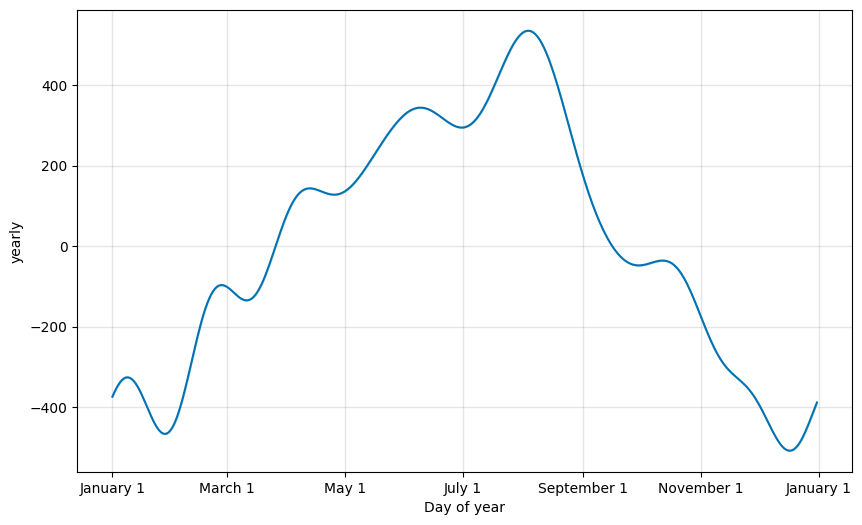

In [9]:
from prophet.plot import plot_yearly

a = plot_yearly(m)

### Predicting

In [38]:
#Creating future dataframe
future = m.make_future_dataframe(periods=7)

In [40]:
#Adding feature values to future dataframe
future = pd.merge(future,feature_df,how="left")
future

,ds,consumption_climate
0,2016-09-01,10.0
1,2016-09-02,10.0
2,2016-09-03,10.0
3,2016-09-04,10.0
4,2016-09-05,10.0
...,...,...
1594,2022-08-03,-36.8
1595,2022-08-04,-36.8
1596,2022-08-05,-36.8
1597,2022-08-06,-36.8


In [41]:
#Predicting
forecast = m.predict(future)

seven_day_forecast = forecast.tail(7)

seven_day_forecast_slim = seven_day_forecast[["ds","yhat_lower","yhat","yhat_upper"]]

prediction_forecast = seven_day_forecast_slim

prediction_forecast["y_true"] = y_test.head(7)

prediction_forecast["error"]=abs(prediction_forecast["yhat"]-prediction_forecast["y_true"])

prediction_forecast

/tmp/ipykernel_4140/2029521229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_forecast["y_true"] = y_test.head(7)
/tmp/ipykernel_4140/2029521229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_forecast["error"]=abs(prediction_forecast["yhat"]-prediction_forecast["y_true"])


,ds,yhat_lower,yhat,yhat_upper,y_true,error
1592,2022-08-01,252.116958,588.555032,935.043381,451.3,137.255032
1593,2022-08-02,237.581935,587.870820,925.750767,742.6,154.729180
1594,2022-08-03,240.408906,588.612322,911.443724,1031.1,442.487678
1595,2022-08-04,253.902249,598.871476,922.356107,967.3,368.428524
1596,2022-08-05,483.410954,807.664646,1163.340096,772.5,35.164646
1597,2022-08-06,745.645145,1097.556768,1428.914687,812.9,284.656768
1598,2022-08-07,651.885364,986.796317,1294.143636,753.2,233.596317


In [42]:
#MAE
from sklearn.metrics import mean_absolute_error

y_true = prediction_forecast["y_true"]
y_pred = prediction_forecast["yhat"]

mae = mean_absolute_error(y_true, y_pred)

mae

236.6168778171136

### Plotting Time Series effects

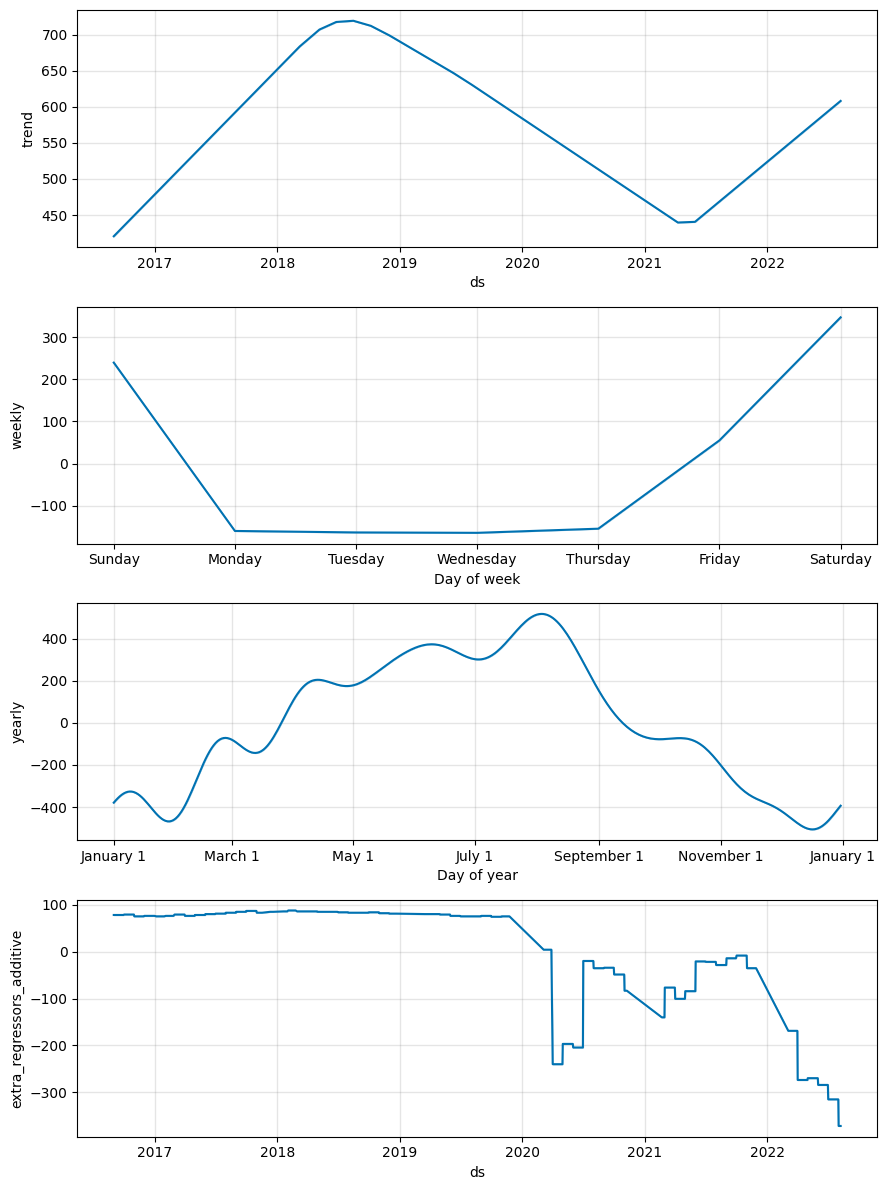

In [43]:
fig2 = m.plot_components(forecast)

In [44]:
from prophet.utilities import regressor_coefficients

coefficients = regressor_coefficients(m)
coefficients

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,consumption_climate,additive,1.867651,9.60635,9.60635,9.60635


### Saving prediction as csv

In [ ]:
#prediction_forecast.to_csv("output_data/baseline_prediction.csv")

## Hypertuning

In [47]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_train)  # Fit model with given params
    df_cv = cross_validation(m, initial='60 days', horizon = '7 days', period = '7 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

15:05:03 - cmdstanpy - INFO - Chain [1] start processing
15:05:03 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:04 - cmdstanpy - INFO - Chain [1] done processing
15:05:04 - cmdstanpy - INFO - Chain [1] done processing
15:05:04 - cmdstanpy - INFO - Chain [1] done processing
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:04 - cmdstanpy - INFO - Chain [1] start processing
15:05:05 - cmdstanpy - INFO - Chain [1] done processing
15:05:05 - cmdstanpy - INFO - Chain [1] done processing
15:05:05 - cmdstanpy - INFO - Chain [1] start processing
15:05:05 - cmdstanpy - INFO - Chain [1] start p

15:05:15 - cmdstanpy - INFO - Chain [1] done processing
15:05:15 - cmdstanpy - INFO - Chain [1] start processing
15:05:15 - cmdstanpy - INFO - Chain [1] done processing
15:05:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:15 - cmdstanpy - INFO - Chain [1] start processing
15:05:15 - cmdstanpy - INFO - Chain [1] start processing
15:05:15 - cmdstanpy - INFO - Chain [1] done processing
15:05:15 - cmdstanpy - INFO - Chain [1] start processing
15:05:15 - cmdstanpy - INFO - Chain [1] done processing
15:05:15 - cmdstanpy - INFO - Chain [1] done processing
15:05:15 - cmdstanpy - INFO - Chain [1] start processing
15:05:15 - cmdstanpy - INFO - Chain [1] start processing
15:05:16 - cmdstanpy - INFO - Chain [1] done processing
15:05:16 - cmdstanpy - INFO - Chain [1] done processing
15:05:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimi

15:05:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:25 - cmdstanpy - INFO - Chain [1] start processing
15:05:25 - cmdstanpy - INFO - Chain [1] done processing
15:05:26 - cmdstanpy - INFO - Chain [1] start processing
15:05:26 - cmdstanpy - INFO - Chain [1] done processing
15:05:26 - cmdstanpy - INFO - Chain [1] done processing
15:05:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:26 - cmdstanpy - INFO - Chain [1] start processing
15:05:26 - cmdstanpy - INFO - Chain [1] start processing
15:05:26 - cmdstanpy - INFO - Chain [1] done processing
15:05:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:26 - cmdstanpy - INFO - Chain [1] start processing
15:05:26 - 

15:05:38 - cmdstanpy - INFO - Chain [1] start processing
15:05:38 - cmdstanpy - INFO - Chain [1] start processing
15:05:38 - cmdstanpy - INFO - Chain [1] done processing
15:05:38 - cmdstanpy - INFO - Chain [1] done processing
15:05:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:39 - cmdstanpy - INFO - Chain [1] start processing
15:05:39 - cmdstanpy - INFO - Chain [1] start processing
15:05:39 - cmdstanpy - INFO - Chain [1] done processing
15:05:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:39 - cmdstanpy - INFO - Chain [1] start processing
15:05:40 - cmdstanpy - INFO - Chain [1] done processing
15:05:41 - cmdstanpy - INFO - Chain [1] start processing
15:05:41 - cmdstanpy - INFO - Chain [1] done processing
15:05:41 - cmdstanpy - ERROR - Chain [1] error: error duri

15:05:57 - cmdstanpy - INFO - Chain [1] done processing
15:05:57 - cmdstanpy - INFO - Chain [1] done processing
15:05:57 - cmdstanpy - INFO - Chain [1] start processing
15:05:57 - cmdstanpy - INFO - Chain [1] done processing
15:05:57 - cmdstanpy - INFO - Chain [1] done processing
15:05:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:57 - cmdstanpy - INFO - Chain [1] start processing
15:05:57 - cmdstanpy - INFO - Chain [1] start processing
15:05:58 - cmdstanpy - INFO - Chain [1] done processing
15:05:58 - cmdstanpy - INFO - Chain [1] start processing
15:05:58 - cmdstanpy - INFO - Chain [1] done processing
15:05:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:05:58 - cmdstanpy - INFO - Chain [1] start processing
15:05:58 - cmdstanpy - INFO - Chain [1] start processing
15

15:06:27 - cmdstanpy - INFO - Chain [1] done processing
15:06:27 - cmdstanpy - INFO - Chain [1] done processing
15:06:27 - cmdstanpy - INFO - Chain [1] done processing
15:06:27 - cmdstanpy - INFO - Chain [1] done processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] done processing
15:06:28 - cmdstanpy - INFO - Chain [1] done processing
15:06:28 - cmdstanpy - INFO - Chain [1] done processing
15:06:28 - cmdstanpy - INFO - Chain [1] done processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] done processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
15:06:29 - cmdstanpy - INFO - Chain [1] 

15:06:43 - cmdstanpy - INFO - Chain [1] start processing
15:06:43 - cmdstanpy - INFO - Chain [1] start processing
15:06:43 - cmdstanpy - INFO - Chain [1] start processing
15:06:43 - cmdstanpy - INFO - Chain [1] done processing
15:06:43 - cmdstanpy - INFO - Chain [1] done processing
15:06:43 - cmdstanpy - INFO - Chain [1] done processing
15:06:43 - cmdstanpy - INFO - Chain [1] done processing
15:06:44 - cmdstanpy - INFO - Chain [1] start processing
15:06:44 - cmdstanpy - INFO - Chain [1] start processing
15:06:44 - cmdstanpy - INFO - Chain [1] start processing
15:06:44 - cmdstanpy - INFO - Chain [1] start processing
15:06:44 - cmdstanpy - INFO - Chain [1] done processing
15:06:44 - cmdstanpy - INFO - Chain [1] done processing
15:06:44 - cmdstanpy - INFO - Chain [1] done processing
15:06:44 - cmdstanpy - INFO - Chain [1] done processing
15:06:44 - cmdstanpy - INFO - Chain [1] start processing
15:06:44 - cmdstanpy - INFO - Chain [1] start processing
15:06:44 - cmdstanpy - INFO - Chain [1]

15:07:04 - cmdstanpy - INFO - Chain [1] start processing
15:07:04 - cmdstanpy - INFO - Chain [1] done processing
15:07:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:04 - cmdstanpy - INFO - Chain [1] start processing
15:07:04 - cmdstanpy - INFO - Chain [1] start processing
15:07:04 - cmdstanpy - INFO - Chain [1] done processing
15:07:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:04 - cmdstanpy - INFO - Chain [1] start processing
15:07:05 - cmdstanpy - INFO - Chain [1] done processing
15:07:05 - cmdstanpy - INFO - Chain [1] start processing
15:07:05 - cmdstanpy - INFO - Chain [1] done processing
15:07:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:05 - 

Optimization terminated abnormally. Falling back to Newton.
15:07:18 - cmdstanpy - INFO - Chain [1] start processing
15:07:19 - cmdstanpy - INFO - Chain [1] done processing
15:07:19 - cmdstanpy - INFO - Chain [1] start processing
15:07:19 - cmdstanpy - INFO - Chain [1] done processing
15:07:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:19 - cmdstanpy - INFO - Chain [1] start processing
15:07:19 - cmdstanpy - INFO - Chain [1] done processing
15:07:19 - cmdstanpy - INFO - Chain [1] done processing
15:07:19 - cmdstanpy - INFO - Chain [1] start processing
15:07:19 - cmdstanpy - INFO - Chain [1] done processing
15:07:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:20 - cmdstanpy - INFO - Chain [1] start processing
15:07:20 - cmdstanpy - INFO - Chain [1] start processin

Optimization terminated abnormally. Falling back to Newton.
15:07:39 - cmdstanpy - INFO - Chain [1] start processing
15:07:39 - cmdstanpy - INFO - Chain [1] done processing
15:07:39 - cmdstanpy - INFO - Chain [1] start processing
15:07:40 - cmdstanpy - INFO - Chain [1] done processing
15:07:40 - cmdstanpy - INFO - Chain [1] start processing
15:07:40 - cmdstanpy - INFO - Chain [1] done processing
15:07:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:40 - cmdstanpy - INFO - Chain [1] start processing
15:07:41 - cmdstanpy - INFO - Chain [1] done processing
15:07:41 - cmdstanpy - INFO - Chain [1] start processing
15:07:41 - cmdstanpy - INFO - Chain [1] done processing
15:07:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:07:41 - cmdstanpy - INFO - Chain [1] start processin

15:08:23 - cmdstanpy - INFO - Chain [1] start processing
15:08:23 - cmdstanpy - INFO - Chain [1] done processing
15:08:23 - cmdstanpy - INFO - Chain [1] start processing
15:08:23 - cmdstanpy - INFO - Chain [1] done processing
15:08:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:08:24 - cmdstanpy - INFO - Chain [1] start processing
15:08:24 - cmdstanpy - INFO - Chain [1] start processing
15:08:24 - cmdstanpy - INFO - Chain [1] done processing
15:08:24 - cmdstanpy - INFO - Chain [1] start processing
15:08:24 - cmdstanpy - INFO - Chain [1] done processing
15:08:25 - cmdstanpy - INFO - Chain [1] start processing
15:08:25 - cmdstanpy - INFO - Chain [1] done processing
15:08:25 - cmdstanpy - INFO - Chain [1] start processing
15:08:25 - cmdstanpy - INFO - Chain [1] done processing
15:08:26 - cmdstanpy - INFO - Chain [1] done processing
15:08:26 - cmdstanpy - INFO - Chain [1] start pro

15:08:46 - cmdstanpy - INFO - Chain [1] done processing
15:08:46 - cmdstanpy - INFO - Chain [1] start processing
15:08:46 - cmdstanpy - INFO - Chain [1] done processing
15:08:46 - cmdstanpy - INFO - Chain [1] start processing
15:08:47 - cmdstanpy - INFO - Chain [1] done processing
15:08:47 - cmdstanpy - INFO - Chain [1] start processing
15:08:47 - cmdstanpy - INFO - Chain [1] done processing
15:08:47 - cmdstanpy - INFO - Chain [1] start processing
15:08:47 - cmdstanpy - INFO - Chain [1] done processing
15:08:47 - cmdstanpy - INFO - Chain [1] start processing
15:08:47 - cmdstanpy - INFO - Chain [1] done processing
15:08:48 - cmdstanpy - INFO - Chain [1] start processing
15:08:48 - cmdstanpy - INFO - Chain [1] done processing
15:08:48 - cmdstanpy - INFO - Chain [1] start processing
15:08:48 - cmdstanpy - INFO - Chain [1] done processing
15:08:48 - cmdstanpy - INFO - Chain [1] start processing
15:08:48 - cmdstanpy - INFO - Chain [1] done processing
15:08:48 - cmdstanpy - INFO - Chain [1] 

15:09:00 - cmdstanpy - INFO - Chain [1] start processing
15:09:00 - cmdstanpy - INFO - Chain [1] start processing
15:09:00 - cmdstanpy - INFO - Chain [1] done processing
15:09:01 - cmdstanpy - INFO - Chain [1] done processing
15:09:01 - cmdstanpy - INFO - Chain [1] done processing
15:09:01 - cmdstanpy - INFO - Chain [1] start processing
15:09:01 - cmdstanpy - INFO - Chain [1] start processing
15:09:01 - cmdstanpy - INFO - Chain [1] start processing
15:09:01 - cmdstanpy - INFO - Chain [1] done processing
15:09:01 - cmdstanpy - INFO - Chain [1] done processing
15:09:02 - cmdstanpy - INFO - Chain [1] done processing
15:09:02 - cmdstanpy - INFO - Chain [1] start processing
15:09:02 - cmdstanpy - INFO - Chain [1] start processing
15:09:02 - cmdstanpy - INFO - Chain [1] start processing
15:09:02 - cmdstanpy - INFO - Chain [1] done processing
15:09:02 - cmdstanpy - INFO - Chain [1] done processing
15:09:03 - cmdstanpy - INFO - Chain [1] done processing
15:09:03 - cmdstanpy - INFO - Chain [1] 

15:09:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:09:21 - cmdstanpy - INFO - Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
15:09:23 - cmdstanpy - INFO - Chain [1] start processing
15:09:23 - cmdstanpy - INFO - Chain [1] done processing
15:09:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:09:23 - cmdstanpy - INFO - Chain [1] start processing
15:09:24 - cmdstanpy - INFO - Chain [1] done processing
15:09:24 - cmdstanpy - INFO - Chain [1] start processing
15:09:24 - cmdstanpy - INFO - Chain [1] done processing
15:09:24 - cmdstanpy - INFO - Chain [1] start processing
15:09:24 - cmdstanpy - INFO - Chain [1] done processing
15

15:09:39 - cmdstanpy - INFO - Chain [1] start processing
15:09:41 - cmdstanpy - INFO - Chain [1] done processing
15:09:41 - cmdstanpy - INFO - Chain [1] start processing
15:09:41 - cmdstanpy - INFO - Chain [1] done processing
15:09:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:09:41 - cmdstanpy - INFO - Chain [1] start processing
15:09:41 - cmdstanpy - INFO - Chain [1] done processing
15:09:42 - cmdstanpy - INFO - Chain [1] start processing
15:09:42 - cmdstanpy - INFO - Chain [1] done processing
15:09:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:09:42 - cmdstanpy - INFO - Chain [1] start processing
15:09:48 - cmdstanpy - INFO - Chain [1] done processing
15:09:48 - cmdstanpy - INFO - Chain [1] start processing
15:09:49 - cmdstanpy - INFO - Chain [1] done processing
15

Optimization terminated abnormally. Falling back to Newton.
15:10:36 - cmdstanpy - INFO - Chain [1] start processing
15:10:38 - cmdstanpy - INFO - Chain [1] done processing
15:10:38 - cmdstanpy - INFO - Chain [1] start processing
15:10:38 - cmdstanpy - INFO - Chain [1] done processing
15:10:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:10:38 - cmdstanpy - INFO - Chain [1] start processing
15:10:40 - cmdstanpy - INFO - Chain [1] done processing
15:10:41 - cmdstanpy - INFO - Chain [1] start processing
15:10:41 - cmdstanpy - INFO - Chain [1] done processing
15:10:41 - cmdstanpy - INFO - Chain [1] done processing
15:10:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:10:41 - cmdstanpy - INFO - Chain [1] start processing
15:10:41 - cmdstanpy - INFO - Chain [1] start processin

15:11:21 - cmdstanpy - INFO - Chain [1] start processing
15:11:21 - cmdstanpy - INFO - Chain [1] done processing
15:11:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:11:21 - cmdstanpy - INFO - Chain [1] start processing
15:11:21 - cmdstanpy - INFO - Chain [1] done processing
15:11:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
15:11:21 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
15:11:21 - cmdstanpy - INFO - Chain [1] start processing
15:11:24 - cmdstanpy - INFO - Chain [1] done processing
15:11:24 - cmdstanpy - INFO - Chain [1] start processing
15:11:24 - cmdstanpy - INFO - Chain [1] done processing
15:11:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:11:25 - 

15:11:51 - cmdstanpy - INFO - Chain [1] start processing
15:11:51 - cmdstanpy - INFO - Chain [1] done processing
15:11:51 - cmdstanpy - INFO - Chain [1] start processing
15:11:52 - cmdstanpy - INFO - Chain [1] done processing
15:11:52 - cmdstanpy - INFO - Chain [1] start processing
15:11:52 - cmdstanpy - INFO - Chain [1] done processing
15:11:53 - cmdstanpy - INFO - Chain [1] start processing
15:11:53 - cmdstanpy - INFO - Chain [1] done processing
15:11:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:11:53 - cmdstanpy - INFO - Chain [1] start processing
15:11:55 - cmdstanpy - INFO - Chain [1] done processing
15:11:55 - cmdstanpy - INFO - Chain [1] start processing
15:11:55 - cmdstanpy - INFO - Chain [1] done processing
15:11:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15

15:12:11 - cmdstanpy - INFO - Chain [1] start processing
15:12:11 - cmdstanpy - INFO - Chain [1] done processing
15:12:11 - cmdstanpy - INFO - Chain [1] start processing
15:12:11 - cmdstanpy - INFO - Chain [1] done processing
15:12:12 - cmdstanpy - INFO - Chain [1] start processing
15:12:12 - cmdstanpy - INFO - Chain [1] start processing
15:12:12 - cmdstanpy - INFO - Chain [1] done processing
15:12:12 - cmdstanpy - INFO - Chain [1] done processing
15:12:12 - cmdstanpy - INFO - Chain [1] start processing
15:12:13 - cmdstanpy - INFO - Chain [1] done processing
15:12:13 - cmdstanpy - INFO - Chain [1] start processing
15:12:13 - cmdstanpy - INFO - Chain [1] done processing
15:12:13 - cmdstanpy - INFO - Chain [1] start processing
15:12:13 - cmdstanpy - INFO - Chain [1] done processing
15:12:13 - cmdstanpy - INFO - Chain [1] start processing
15:12:13 - cmdstanpy - INFO - Chain [1] done processing
15:12:14 - cmdstanpy - INFO - Chain [1] start processing
15:12:14 - cmdstanpy - INFO - Chain [1]

15:13:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:13:32 - cmdstanpy - INFO - Chain [1] start processing
15:13:36 - cmdstanpy - INFO - Chain [1] done processing
15:13:37 - cmdstanpy - INFO - Chain [1] start processing
15:13:37 - cmdstanpy - INFO - Chain [1] done processing
15:13:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:13:37 - cmdstanpy - INFO - Chain [1] start processing
15:13:39 - cmdstanpy - INFO - Chain [1] done processing
15:13:39 - cmdstanpy - INFO - Chain [1] start processing
15:13:39 - cmdstanpy - INFO - Chain [1] done processing
15:13:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:13:39 - cmdstanpy - INFO - Chain [1] start processing
15:13:40 - 

15:13:50 - cmdstanpy - INFO - Chain [1] start processing
15:13:50 - cmdstanpy - INFO - Chain [1] done processing
15:13:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:13:50 - cmdstanpy - INFO - Chain [1] start processing
15:13:54 - cmdstanpy - INFO - Chain [1] done processing
15:13:54 - cmdstanpy - INFO - Chain [1] start processing
15:13:54 - cmdstanpy - INFO - Chain [1] done processing
15:13:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:13:54 - cmdstanpy - INFO - Chain [1] start processing
15:13:59 - cmdstanpy - INFO - Chain [1] done processing
15:13:59 - cmdstanpy - INFO - Chain [1] start processing
15:13:59 - cmdstanpy - INFO - Chain [1] done processing
15:13:59 - cmdstanpy - INFO - Chain [1] start processing
15:13:59 - cmdstanpy - INFO - Chain [1] done processing
15

15:14:23 - cmdstanpy - INFO - Chain [1] done processing
15:14:24 - cmdstanpy - INFO - Chain [1] start processing
15:14:24 - cmdstanpy - INFO - Chain [1] done processing
15:14:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:14:24 - cmdstanpy - INFO - Chain [1] start processing
15:14:25 - cmdstanpy - INFO - Chain [1] done processing
15:14:25 - cmdstanpy - INFO - Chain [1] done processing
15:14:25 - cmdstanpy - INFO - Chain [1] start processing
15:14:25 - cmdstanpy - INFO - Chain [1] done processing
15:14:25 - cmdstanpy - INFO - Chain [1] start processing
15:14:25 - cmdstanpy - INFO - Chain [1] done processing
15:14:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:14:25 - cmdstanpy - INFO - Chain [1] start processing
15:14:25 - cmdstanpy - INFO - Chain [1] start processing
15

Optimization terminated abnormally. Falling back to Newton.
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
15:14:45 - cmdstanpy - INFO - Chain [1] done processing
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
15:14:45 - cmdstanpy - INFO - Chain [1] done processing
15:14:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
15:14:45 - cmdstanpy - INFO - Chain [1] done processing
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
15:14:46 - cmdstanpy - INFO - Chain [1] done processing
15:14:46 - cmdstanpy - INFO - Chain [1] start processing
15:14:46 - cmdstanpy - INFO - Chain [1] done processing
15:14:46 - cmdstanpy - INFO - Chain [1] start processing
15:14:46 - cmdstanpy - INFO - Chain [1] done processing
15:14:47 - cmdstanpy - INFO - Chain [1] start

15:15:18 - cmdstanpy - INFO - Chain [1] done processing
15:15:19 - cmdstanpy - INFO - Chain [1] start processing
15:15:19 - cmdstanpy - INFO - Chain [1] done processing
15:15:20 - cmdstanpy - INFO - Chain [1] start processing
15:15:20 - cmdstanpy - INFO - Chain [1] done processing
15:15:20 - cmdstanpy - INFO - Chain [1] start processing
15:15:20 - cmdstanpy - INFO - Chain [1] done processing
15:15:20 - cmdstanpy - INFO - Chain [1] done processing
15:15:21 - cmdstanpy - INFO - Chain [1] start processing
15:15:21 - cmdstanpy - INFO - Chain [1] start processing
15:15:21 - cmdstanpy - INFO - Chain [1] done processing
15:15:21 - cmdstanpy - INFO - Chain [1] done processing
15:15:21 - cmdstanpy - INFO - Chain [1] start processing
15:15:21 - cmdstanpy - INFO - Chain [1] start processing
15:15:21 - cmdstanpy - INFO - Chain [1] done processing
15:15:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to N

15:15:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:15:36 - cmdstanpy - INFO - Chain [1] done processing
15:15:36 - cmdstanpy - INFO - Chain [1] done processing
15:15:36 - cmdstanpy - INFO - Chain [1] start processing
15:15:36 - cmdstanpy - INFO - Chain [1] start processing
15:15:36 - cmdstanpy - INFO - Chain [1] start processing
15:15:36 - cmdstanpy - INFO - Chain [1] done processing
15:15:36 - cmdstanpy - INFO - Chain [1] start processing
15:15:36 - cmdstanpy - INFO - Chain [1] done processing
15:15:37 - cmdstanpy - INFO - Chain [1] done processing
15:15:37 - cmdstanpy - INFO - Chain [1] start processing
15:15:37 - cmdstanpy - INFO - Chain [1] start processing
15:15:37 - cmdstanpy - INFO - Chain [1] done processing
15:15:37 - cmdstanpy - INFO - Chain [1] done processing
15:15:37 - cmdstanpy - INFO - Chain [1] start processing
15:15:37 - cmdstanpy - INFO - Chain [1] done proc

15:15:50 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
15:15:50 - cmdstanpy - INFO - Chain [1] start processing
15:15:50 - cmdstanpy - INFO - Chain [1] done processing
15:15:50 - cmdstanpy - INFO - Chain [1] start processing
15:15:50 - cmdstanpy - INFO - Chain [1] done processing
15:15:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:15:50 - cmdstanpy - INFO - Chain [1] start processing
15:15:50 - cmdstanpy - INFO - Chain [1] start processing
15:15:50 - cmdstanpy - INFO - Chain [1] done processing
15:15:50 - cmdstanpy - INFO - Chain [1] start processing
15:15:50 - cmdstanpy - INFO - Chain [1] done processing
15:15:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:15:50 - cmdstanpy - INFO - Chain [1] start processi

15:15:55 - cmdstanpy - INFO - Chain [1] done processing
15:15:55 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] start processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] done processing
15:15:56 - cmdstanpy - INFO - Chain [1] 

15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] done processing
15:16:04 - cmdstanpy - INFO - Chain [1] done processing
15:16:04 - cmdstanpy - INFO - Chain [1] done processing
15:16:04 - cmdstanpy - INFO - Chain [1] done processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:04 - cmdstanpy - INFO - Chain [1] done processing
15:16:04 - cmdstanpy - INFO - Chain [1] start processing
15:16:05 - cmdstanpy - INFO - Chain [1] done processing
15:16:05 - cmdstanpy - INFO - Chain [1] done processing
15:16:05 - cmdstanpy - INFO - Chain [1] done processing
15:16:05 - cmdstanpy - INFO - Chain [1] start processing
15:16:05 - cmdstanpy - INFO - Chain [1]

15:16:17 - cmdstanpy - INFO - Chain [1] start processing
15:16:17 - cmdstanpy - INFO - Chain [1] start processing
15:16:17 - cmdstanpy - INFO - Chain [1] start processing
15:16:17 - cmdstanpy - INFO - Chain [1] done processing
15:16:17 - cmdstanpy - INFO - Chain [1] done processing
15:16:18 - cmdstanpy - INFO - Chain [1] done processing
15:16:18 - cmdstanpy - INFO - Chain [1] done processing
15:16:18 - cmdstanpy - INFO - Chain [1] start processing
15:16:18 - cmdstanpy - INFO - Chain [1] start processing
15:16:18 - cmdstanpy - INFO - Chain [1] start processing
15:16:18 - cmdstanpy - INFO - Chain [1] start processing
15:16:18 - cmdstanpy - INFO - Chain [1] done processing
15:16:18 - cmdstanpy - INFO - Chain [1] done processing
15:16:18 - cmdstanpy - INFO - Chain [1] done processing
15:16:19 - cmdstanpy - INFO - Chain [1] done processing
15:16:19 - cmdstanpy - INFO - Chain [1] start processing
15:16:19 - cmdstanpy - INFO - Chain [1] start processing
15:16:19 - cmdstanpy - INFO - Chain [1]

15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:28 - cmdstanpy - INFO - Chain [1] done processing
15:16:28 - cmdstanpy - INFO - Chain [1] start processing
15:16:29 - cmdstanpy - INFO - Chain [1] done processing
15:16:29 - cmdstanpy - INFO - Chain [1] done processing
15:16:29 - cmdstanpy - INFO - Chain [1] 

15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] done processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:35 - cmdstanpy - INFO - Chain [1] start processing
15:16:36 - cmdstanpy - INFO - Chain [1]

15:16:44 - cmdstanpy - INFO - Chain [1] done processing
15:16:44 - cmdstanpy - INFO - Chain [1] done processing
15:16:44 - cmdstanpy - INFO - Chain [1] done processing
15:16:44 - cmdstanpy - INFO - Chain [1] done processing
15:16:44 - cmdstanpy - INFO - Chain [1] start processing
15:16:44 - cmdstanpy - INFO - Chain [1] start processing
15:16:44 - cmdstanpy - INFO - Chain [1] start processing
15:16:44 - cmdstanpy - INFO - Chain [1] start processing
15:16:45 - cmdstanpy - INFO - Chain [1] done processing
15:16:45 - cmdstanpy - INFO - Chain [1] done processing
15:16:45 - cmdstanpy - INFO - Chain [1] done processing
15:16:45 - cmdstanpy - INFO - Chain [1] done processing
15:16:45 - cmdstanpy - INFO - Chain [1] start processing
15:16:45 - cmdstanpy - INFO - Chain [1] start processing
15:16:45 - cmdstanpy - INFO - Chain [1] start processing
15:16:45 - cmdstanpy - INFO - Chain [1] start processing
15:16:45 - cmdstanpy - INFO - Chain [1] done processing
15:16:45 - cmdstanpy - INFO - Chain [1] 

15:16:57 - cmdstanpy - INFO - Chain [1] start processing
15:16:57 - cmdstanpy - INFO - Chain [1] start processing
15:16:57 - cmdstanpy - INFO - Chain [1] done processing
15:16:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
15:16:57 - cmdstanpy - INFO - Chain [1] start processing
15:16:57 - cmdstanpy - INFO - Chain [1] start processing
15:16:57 - cmdstanpy - INFO - Chain [1] done processing
15:16:58 - cmdstanpy - INFO - Chain [1] start processing
15:16:58 - cmdstanpy - INFO - Chain [1] done processing
15:16:58 - cmdstanpy - INFO - Chain [1] done processing
15:16:58 - cmdstanpy - INFO - Chain [1] done processing
15:16:58 - cmdstanpy - INFO - Chain [1] start processing
15:16:58 - cmdstanpy - INFO - Chain [1] start processing
15:16:58 - cmdstanpy - INFO - Chain [1] done processing
15:16:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
15:16

15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:05 - cmdstanpy - INFO - Chain [1] 

15:17:12 - cmdstanpy - INFO - Chain [1] done processing
15:17:12 - cmdstanpy - INFO - Chain [1] start processing
15:17:12 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] done processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:13 - cmdstanpy - INFO - Chain [1] start processing
15:17:14 - cmdstanpy - INFO - Chain [1]

15:17:25 - cmdstanpy - INFO - Chain [1] done processing
15:17:25 - cmdstanpy - INFO - Chain [1] start processing
15:17:25 - cmdstanpy - INFO - Chain [1] start processing
15:17:25 - cmdstanpy - INFO - Chain [1] done processing
15:17:25 - cmdstanpy - INFO - Chain [1] done processing
15:17:25 - cmdstanpy - INFO - Chain [1] done processing
15:17:25 - cmdstanpy - INFO - Chain [1] start processing
15:17:25 - cmdstanpy - INFO - Chain [1] start processing
15:17:26 - cmdstanpy - INFO - Chain [1] start processing
15:17:26 - cmdstanpy - INFO - Chain [1] start processing
15:17:26 - cmdstanpy - INFO - Chain [1] done processing
15:17:26 - cmdstanpy - INFO - Chain [1] done processing
15:17:26 - cmdstanpy - INFO - Chain [1] done processing
15:17:26 - cmdstanpy - INFO - Chain [1] done processing
15:17:26 - cmdstanpy - INFO - Chain [1] start processing
15:17:26 - cmdstanpy - INFO - Chain [1] start processing
15:17:26 - cmdstanpy - INFO - Chain [1] start processing
15:17:26 - cmdstanpy - INFO - Chain [1]

15:17:33 - cmdstanpy - INFO - Chain [1] start processing
15:17:33 - cmdstanpy - INFO - Chain [1] start processing
15:17:33 - cmdstanpy - INFO - Chain [1] done processing
15:17:33 - cmdstanpy - INFO - Chain [1] start processing
15:17:33 - cmdstanpy - INFO - Chain [1] done processing
15:17:33 - cmdstanpy - INFO - Chain [1] done processing
15:17:33 - cmdstanpy - INFO - Chain [1] start processing
15:17:33 - cmdstanpy - INFO - Chain [1] done processing
15:17:33 - cmdstanpy - INFO - Chain [1] start processing
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
15:17:34 - cmdstanpy - INFO - Chain [1] done processing
15:17:34 - cmdstanpy - INFO - Chain [1] done processing
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
15:17:34 - cmdstanpy - INFO - Chain [1] done processing
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
15:17:34 - cmdstanpy - INFO - Chain [1] done processing
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
15:17:34 - cmdstanpy - INFO - Chain [1]

15:17:39 - cmdstanpy - INFO - Chain [1] start processing
15:17:39 - cmdstanpy - INFO - Chain [1] start processing
15:17:39 - cmdstanpy - INFO - Chain [1] done processing
15:17:39 - cmdstanpy - INFO - Chain [1] start processing
15:17:39 - cmdstanpy - INFO - Chain [1] done processing
15:17:39 - cmdstanpy - INFO - Chain [1] done processing
15:17:40 - cmdstanpy - INFO - Chain [1] done processing
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
15:17:40 - cmdstanpy - INFO - Chain [1] done processing
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
15:17:40 - cmdstanpy - INFO - Chain [1] done processing
15:17:40 - cmdstanpy - INFO - Chain [1] done processing
15:17:40 - cmdstanpy - INFO - Chain [1] done processing
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
15:17:40 - cmdstanpy - INFO - Chain [1]

15:17:49 - cmdstanpy - INFO - Chain [1] start processing
15:17:49 - cmdstanpy - INFO - Chain [1] start processing
15:17:49 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] start processing
15:17:50 - cmdstanpy - INFO - Chain [1] start processing
15:17:50 - cmdstanpy - INFO - Chain [1] start processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] start processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
15:17:51 - cmdstanpy - INFO - Chain [1] start processing
15:17:51 - cmdstanpy - INFO - Chain [1] done processing
15:17:51 - cmdstanpy - INFO - Chain [1] start processing
15:17:51 - cmdstanpy - INFO - Chain [1] 

15:18:03 - cmdstanpy - INFO - Chain [1] start processing
15:18:03 - cmdstanpy - INFO - Chain [1] done processing
15:18:03 - cmdstanpy - INFO - Chain [1] start processing
15:18:03 - cmdstanpy - INFO - Chain [1] done processing
15:18:03 - cmdstanpy - INFO - Chain [1] done processing
15:18:03 - cmdstanpy - INFO - Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
15:18:04 - cmdstanpy - INFO - Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
15:18:04 - cmdstanpy - INFO - Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
15:18:04 - cmdstanpy - INFO - Chain [1] 

15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] done processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
15:18:11 - cmdstanpy - INFO - Chain [1] start processing
15:18:11 - cmdstanpy - INFO - Chain [1] done processing
15:18:11 - cmdstanpy - INFO - Chain [1] 

15:18:21 - cmdstanpy - INFO - Chain [1] done processing
15:18:21 - cmdstanpy - INFO - Chain [1] start processing
15:18:21 - cmdstanpy - INFO - Chain [1] done processing
15:18:21 - cmdstanpy - INFO - Chain [1] done processing
15:18:21 - cmdstanpy - INFO - Chain [1] done processing
15:18:21 - cmdstanpy - INFO - Chain [1] start processing
15:18:21 - cmdstanpy - INFO - Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] done processing
15:18:22 - cmdstanpy - INFO - Chain [1] done processing
15:18:22 - cmdstanpy - INFO - Chain [1] done processing
15:18:22 - cmdstanpy - INFO - Chain [1] done processing
15:18:22 - cmdstanpy - INFO - Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] done processing
15:18:22 - cmdstanpy - INFO - Chain [1] 

15:18:39 - cmdstanpy - INFO - Chain [1] start processing
15:18:39 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:41 - cmdstanpy - INFO - Chain [1] done processing
15:18:41 - cmdstanpy - INFO - Chain [1] done processing
15:18:41 - cmdstanpy - INFO - Chain [1] done processing
15:18:41 - cmdstanpy - INFO - Chain [1] start processing
15:18:41 - cmdstanpy - INFO - Chain [1] done processing
15:18:42 - cmdstanpy - INFO - Chain [1] start processing
15:18:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
15:18:43 - cmdstanpy - INFO - Chain [1] start proc

15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
15:18:50 - cmdstanpy - INFO - Chain [1] done processing
15:18:50 - cmdstanpy - INFO - Chain [1] 

15:18:57 - cmdstanpy - INFO - Chain [1] done processing
15:18:57 - cmdstanpy - INFO - Chain [1] start processing
15:18:57 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] done processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
15:18:58 - cmdstanpy - INFO - Chain [1]

15:19:12 - cmdstanpy - INFO - Chain [1] done processing
15:19:13 - cmdstanpy - INFO - Chain [1] done processing
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
15:19:13 - cmdstanpy - INFO - Chain [1] done processing
15:19:13 - cmdstanpy - INFO - Chain [1] done processing
15:19:14 - cmdstanpy - INFO - Chain [1] done processing
15:19:14 - cmdstanpy - INFO - Chain [1] done processing
15:19:14 - cmdstanpy - INFO - Chain [1] start processing
15:19:14 - cmdstanpy - INFO - Chain [1] start processing
15:19:14 - cmdstanpy - INFO - Chain [1] start processing
15:19:14 - cmdstanpy - INFO - Chain [1] start processing
15:19:14 - cmdstanpy - INFO - Chain [1] done processing
15:19:15 - cmdstanpy - INFO - Chain [1] done processing
15:19:15 - cmdstanpy - INFO - Chain [1] done processing
15:19:15 - cmdstanpy - INFO - Chain [1] 

15:19:27 - cmdstanpy - INFO - Chain [1] start processing
15:19:27 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1]

15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:35 - cmdstanpy - INFO - Chain [1] start processing
15:19:35 - cmdstanpy - INFO - Chain [1] done processing
15:19:36 - cmdstanpy - INFO - Chain [1] start processing
15:19:36 - cmdstanpy - INFO - Chain [1] done processing
15:19:36 - cmdstanpy - INFO - Chain [1] start processing
15:19:36 - cmdstanpy - INFO - Chain [1]

15:19:46 - cmdstanpy - INFO - Chain [1] done processing
15:19:46 - cmdstanpy - INFO - Chain [1] start processing
15:19:46 - cmdstanpy - INFO - Chain [1] start processing
15:19:46 - cmdstanpy - INFO - Chain [1] done processing
15:19:46 - cmdstanpy - INFO - Chain [1] start processing
15:19:46 - cmdstanpy - INFO - Chain [1] done processing
15:19:46 - cmdstanpy - INFO - Chain [1] done processing
15:19:46 - cmdstanpy - INFO - Chain [1] start processing
15:19:46 - cmdstanpy - INFO - Chain [1] done processing
15:19:47 - cmdstanpy - INFO - Chain [1] start processing
15:19:47 - cmdstanpy - INFO - Chain [1] start processing
15:19:47 - cmdstanpy - INFO - Chain [1] done processing
15:19:47 - cmdstanpy - INFO - Chain [1] start processing
15:19:47 - cmdstanpy - INFO - Chain [1] done processing
15:19:47 - cmdstanpy - INFO - Chain [1] start processing
15:19:47 - cmdstanpy - INFO - Chain [1] done processing
15:19:47 - cmdstanpy - INFO - Chain [1] start processing
15:19:47 - cmdstanpy - INFO - Chain [1]

15:20:04 - cmdstanpy - INFO - Chain [1] done processing
15:20:04 - cmdstanpy - INFO - Chain [1] start processing
15:20:04 - cmdstanpy - INFO - Chain [1] start processing
15:20:04 - cmdstanpy - INFO - Chain [1] done processing
15:20:04 - cmdstanpy - INFO - Chain [1] done processing
15:20:04 - cmdstanpy - INFO - Chain [1] start processing
15:20:04 - cmdstanpy - INFO - Chain [1] done processing
15:20:04 - cmdstanpy - INFO - Chain [1] done processing
15:20:04 - cmdstanpy - INFO - Chain [1] start processing
15:20:05 - cmdstanpy - INFO - Chain [1] done processing
15:20:05 - cmdstanpy - INFO - Chain [1] start processing
15:20:05 - cmdstanpy - INFO - Chain [1] done processing
15:20:05 - cmdstanpy - INFO - Chain [1] start processing
15:20:05 - cmdstanpy - INFO - Chain [1] start processing
15:20:05 - cmdstanpy - INFO - Chain [1] done processing
15:20:05 - cmdstanpy - INFO - Chain [1] done processing
15:20:05 - cmdstanpy - INFO - Chain [1] start processing
15:20:05 - cmdstanpy - INFO - Chain [1] 

15:20:10 - cmdstanpy - INFO - Chain [1] done processing
15:20:10 - cmdstanpy - INFO - Chain [1] done processing
15:20:10 - cmdstanpy - INFO - Chain [1] done processing
15:20:10 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
15:20:11 - cmdstanpy - INFO - Chain [1] 

15:20:20 - cmdstanpy - INFO - Chain [1] start processing
15:20:20 - cmdstanpy - INFO - Chain [1] done processing
15:20:20 - cmdstanpy - INFO - Chain [1] done processing
15:20:20 - cmdstanpy - INFO - Chain [1] start processing
15:20:20 - cmdstanpy - INFO - Chain [1] start processing
15:20:20 - cmdstanpy - INFO - Chain [1] start processing
15:20:20 - cmdstanpy - INFO - Chain [1] done processing
15:20:20 - cmdstanpy - INFO - Chain [1] done processing
15:20:20 - cmdstanpy - INFO - Chain [1] start processing
15:20:20 - cmdstanpy - INFO - Chain [1] done processing
15:20:21 - cmdstanpy - INFO - Chain [1] done processing
15:20:21 - cmdstanpy - INFO - Chain [1] start processing
15:20:21 - cmdstanpy - INFO - Chain [1] start processing
15:20:21 - cmdstanpy - INFO - Chain [1] start processing
15:20:21 - cmdstanpy - INFO - Chain [1] done processing
15:20:21 - cmdstanpy - INFO - Chain [1] done processing
15:20:21 - cmdstanpy - INFO - Chain [1] start processing
15:20:21 - cmdstanpy - INFO - Chain [1]

15:20:37 - cmdstanpy - INFO - Chain [1] done processing
15:20:37 - cmdstanpy - INFO - Chain [1] done processing
15:20:38 - cmdstanpy - INFO - Chain [1] done processing
15:20:38 - cmdstanpy - INFO - Chain [1] done processing
15:20:38 - cmdstanpy - INFO - Chain [1] start processing
15:20:38 - cmdstanpy - INFO - Chain [1] start processing
15:20:38 - cmdstanpy - INFO - Chain [1] start processing
15:20:38 - cmdstanpy - INFO - Chain [1] start processing
15:20:38 - cmdstanpy - INFO - Chain [1] done processing
15:20:38 - cmdstanpy - INFO - Chain [1] done processing
15:20:38 - cmdstanpy - INFO - Chain [1] done processing
15:20:39 - cmdstanpy - INFO - Chain [1] done processing
15:20:39 - cmdstanpy - INFO - Chain [1] start processing
15:20:39 - cmdstanpy - INFO - Chain [1] start processing
15:20:39 - cmdstanpy - INFO - Chain [1] start processing
15:20:39 - cmdstanpy - INFO - Chain [1] start processing
15:20:39 - cmdstanpy - INFO - Chain [1] done processing
15:20:40 - cmdstanpy - INFO - Chain [1] 

15:20:50 - cmdstanpy - INFO - Chain [1] start processing
15:20:50 - cmdstanpy - INFO - Chain [1] done processing
15:20:50 - cmdstanpy - INFO - Chain [1] start processing
15:20:50 - cmdstanpy - INFO - Chain [1] start processing
15:20:50 - cmdstanpy - INFO - Chain [1] start processing
15:20:50 - cmdstanpy - INFO - Chain [1] done processing
15:20:50 - cmdstanpy - INFO - Chain [1] start processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
15:20:51 - cmdstanpy - INFO - Chain [1] start processing
15:20:51 - cmdstanpy - INFO - Chain [1] start processing
15:20:51 - cmdstanpy - INFO - Chain [1] start processing
15:20:51 - cmdstanpy - INFO - Chain [1] start processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
15:20:51 - cmdstanpy - INFO - Chain [1]

15:21:08 - cmdstanpy - INFO - Chain [1] done processing
15:21:09 - cmdstanpy - INFO - Chain [1] start processing
15:21:09 - cmdstanpy - INFO - Chain [1] done processing
15:21:09 - cmdstanpy - INFO - Chain [1] done processing
15:21:09 - cmdstanpy - INFO - Chain [1] start processing
15:21:09 - cmdstanpy - INFO - Chain [1] start processing
15:21:09 - cmdstanpy - INFO - Chain [1] start processing
15:21:09 - cmdstanpy - INFO - Chain [1] done processing
15:21:10 - cmdstanpy - INFO - Chain [1] done processing
15:21:10 - cmdstanpy - INFO - Chain [1] done processing
15:21:10 - cmdstanpy - INFO - Chain [1] start processing
15:21:10 - cmdstanpy - INFO - Chain [1] start processing
15:21:11 - cmdstanpy - INFO - Chain [1] start processing
15:21:11 - cmdstanpy - INFO - Chain [1] done processing
15:21:11 - cmdstanpy - INFO - Chain [1] done processing
15:21:11 - cmdstanpy - INFO - Chain [1] done processing
15:21:11 - cmdstanpy - INFO - Chain [1] start processing
15:21:12 - cmdstanpy - INFO - Chain [1] 

15:21:41 - cmdstanpy - INFO - Chain [1] start processing
15:21:41 - cmdstanpy - INFO - Chain [1] done processing
15:21:41 - cmdstanpy - INFO - Chain [1] done processing
15:21:42 - cmdstanpy - INFO - Chain [1] start processing
15:21:42 - cmdstanpy - INFO - Chain [1] start processing
15:21:42 - cmdstanpy - INFO - Chain [1] done processing
15:21:42 - cmdstanpy - INFO - Chain [1] done processing
15:21:43 - cmdstanpy - INFO - Chain [1] start processing
15:21:43 - cmdstanpy - INFO - Chain [1] start processing
15:21:44 - cmdstanpy - INFO - Chain [1] done processing
15:21:44 - cmdstanpy - INFO - Chain [1] done processing
15:21:44 - cmdstanpy - INFO - Chain [1] done processing
15:21:44 - cmdstanpy - INFO - Chain [1] done processing
15:21:44 - cmdstanpy - INFO - Chain [1] start processing
15:21:44 - cmdstanpy - INFO - Chain [1] start processing
15:21:45 - cmdstanpy - INFO - Chain [1] start processing
15:21:45 - cmdstanpy - INFO - Chain [1] start processing
15:21:46 - cmdstanpy - INFO - Chain [1]

15:22:15 - cmdstanpy - INFO - Chain [1] start processing
15:22:15 - cmdstanpy - INFO - Chain [1] done processing
15:22:15 - cmdstanpy - INFO - Chain [1] start processing
15:22:15 - cmdstanpy - INFO - Chain [1] done processing
15:22:15 - cmdstanpy - INFO - Chain [1] done processing
15:22:15 - cmdstanpy - INFO - Chain [1] start processing
15:22:16 - cmdstanpy - INFO - Chain [1] done processing
15:22:16 - cmdstanpy - INFO - Chain [1] start processing
15:22:16 - cmdstanpy - INFO - Chain [1] start processing
15:22:16 - cmdstanpy - INFO - Chain [1] done processing
15:22:16 - cmdstanpy - INFO - Chain [1] start processing
15:22:16 - cmdstanpy - INFO - Chain [1] done processing
15:22:16 - cmdstanpy - INFO - Chain [1] done processing
15:22:16 - cmdstanpy - INFO - Chain [1] start processing
15:22:16 - cmdstanpy - INFO - Chain [1] done processing
15:22:16 - cmdstanpy - INFO - Chain [1] start processing
15:22:16 - cmdstanpy - INFO - Chain [1] done processing
15:22:16 - cmdstanpy - INFO - Chain [1] 

15:22:24 - cmdstanpy - INFO - Chain [1] done processing
15:22:24 - cmdstanpy - INFO - Chain [1] done processing
15:22:24 - cmdstanpy - INFO - Chain [1] start processing
15:22:24 - cmdstanpy - INFO - Chain [1] start processing
15:22:24 - cmdstanpy - INFO - Chain [1] done processing
15:22:24 - cmdstanpy - INFO - Chain [1] start processing
15:22:24 - cmdstanpy - INFO - Chain [1] start processing
15:22:24 - cmdstanpy - INFO - Chain [1] done processing
15:22:24 - cmdstanpy - INFO - Chain [1] done processing
15:22:24 - cmdstanpy - INFO - Chain [1] start processing
15:22:24 - cmdstanpy - INFO - Chain [1] done processing
15:22:25 - cmdstanpy - INFO - Chain [1] start processing
15:22:25 - cmdstanpy - INFO - Chain [1] start processing
15:22:25 - cmdstanpy - INFO - Chain [1] done processing
15:22:25 - cmdstanpy - INFO - Chain [1] start processing
15:22:25 - cmdstanpy - INFO - Chain [1] done processing
15:22:25 - cmdstanpy - INFO - Chain [1] done processing
15:22:25 - cmdstanpy - INFO - Chain [1] 

15:22:39 - cmdstanpy - INFO - Chain [1] start processing
15:22:39 - cmdstanpy - INFO - Chain [1] start processing
15:22:39 - cmdstanpy - INFO - Chain [1] start processing
15:22:39 - cmdstanpy - INFO - Chain [1] start processing
15:22:40 - cmdstanpy - INFO - Chain [1] done processing
15:22:40 - cmdstanpy - INFO - Chain [1] done processing
15:22:40 - cmdstanpy - INFO - Chain [1] done processing
15:22:40 - cmdstanpy - INFO - Chain [1] done processing
15:22:40 - cmdstanpy - INFO - Chain [1] start processing
15:22:40 - cmdstanpy - INFO - Chain [1] start processing
15:22:41 - cmdstanpy - INFO - Chain [1] start processing
15:22:41 - cmdstanpy - INFO - Chain [1] start processing
15:22:41 - cmdstanpy - INFO - Chain [1] done processing
15:22:41 - cmdstanpy - INFO - Chain [1] done processing
15:22:41 - cmdstanpy - INFO - Chain [1] done processing
15:22:42 - cmdstanpy - INFO - Chain [1] start processing
15:22:42 - cmdstanpy - INFO - Chain [1] done processing
15:22:42 - cmdstanpy - INFO - Chain [1]

15:23:10 - cmdstanpy - INFO - Chain [1] start processing
15:23:10 - cmdstanpy - INFO - Chain [1] start processing
15:23:10 - cmdstanpy - INFO - Chain [1] done processing
15:23:10 - cmdstanpy - INFO - Chain [1] done processing
15:23:10 - cmdstanpy - INFO - Chain [1] done processing
15:23:10 - cmdstanpy - INFO - Chain [1] start processing
15:23:10 - cmdstanpy - INFO - Chain [1] start processing
15:23:10 - cmdstanpy - INFO - Chain [1] start processing
15:23:11 - cmdstanpy - INFO - Chain [1] done processing
15:23:11 - cmdstanpy - INFO - Chain [1] done processing
15:23:11 - cmdstanpy - INFO - Chain [1] done processing
15:23:11 - cmdstanpy - INFO - Chain [1] start processing
15:23:11 - cmdstanpy - INFO - Chain [1] done processing
15:23:11 - cmdstanpy - INFO - Chain [1] start processing
15:23:11 - cmdstanpy - INFO - Chain [1] start processing
15:23:11 - cmdstanpy - INFO - Chain [1] done processing
15:23:11 - cmdstanpy - INFO - Chain [1] done processing
15:23:11 - cmdstanpy - INFO - Chain [1] 

15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1]

15:23:28 - cmdstanpy - INFO - Chain [1] start processing
15:23:28 - cmdstanpy - INFO - Chain [1] done processing
15:23:28 - cmdstanpy - INFO - Chain [1] done processing
15:23:28 - cmdstanpy - INFO - Chain [1] start processing
15:23:28 - cmdstanpy - INFO - Chain [1] done processing
15:23:29 - cmdstanpy - INFO - Chain [1] done processing
15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:29 - cmdstanpy - INFO - Chain [1] done processing
15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:29 - cmdstanpy - INFO - Chain [1] done processing
15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:29 - cmdstanpy - INFO - Chain [1] done processing
15:23:29 - cmdstanpy - INFO - Chain [1] done processing
15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:30 - cmdstanpy - INFO - Chain [1] start processing
15:23:30 - cmdstanpy - INFO - Chain [1] done processing
15:23:30 - cmdstanpy - INFO - Chain [1] 

15:23:53 - cmdstanpy - INFO - Chain [1] start processing
15:23:53 - cmdstanpy - INFO - Chain [1] start processing
15:23:53 - cmdstanpy - INFO - Chain [1] start processing
15:23:54 - cmdstanpy - INFO - Chain [1] done processing
15:23:54 - cmdstanpy - INFO - Chain [1] start processing
15:23:54 - cmdstanpy - INFO - Chain [1] done processing
15:23:55 - cmdstanpy - INFO - Chain [1] done processing
15:23:55 - cmdstanpy - INFO - Chain [1] start processing
15:23:55 - cmdstanpy - INFO - Chain [1] done processing
15:23:56 - cmdstanpy - INFO - Chain [1] start processing
15:23:56 - cmdstanpy - INFO - Chain [1] start processing
15:23:56 - cmdstanpy - INFO - Chain [1] done processing
15:23:56 - cmdstanpy - INFO - Chain [1] done processing
15:23:57 - cmdstanpy - INFO - Chain [1] start processing
15:23:57 - cmdstanpy - INFO - Chain [1] done processing
15:23:57 - cmdstanpy - INFO - Chain [1] done processing
15:23:57 - cmdstanpy - INFO - Chain [1] start processing
15:23:57 - cmdstanpy - INFO - Chain [1]

15:24:10 - cmdstanpy - INFO - Chain [1] done processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] done processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] done processing
15:24:10 - cmdstanpy - INFO - Chain [1] done processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] done processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] start processing
15:24:10 - cmdstanpy - INFO - Chain [1] done processing
15:24:11 - cmdstanpy - INFO - Chain [1] done processing
15:24:11 - cmdstanpy - INFO - Chain [1] done processing
15:24:11 - cmdstanpy - INFO - Chain [1] start processing
15:24:11 - cmdstanpy - INFO - Chain [1] done processing
15:24:11 - cmdstanpy - INFO - Chain [1] 

15:24:19 - cmdstanpy - INFO - Chain [1] start processing
15:24:19 - cmdstanpy - INFO - Chain [1] done processing
15:24:19 - cmdstanpy - INFO - Chain [1] done processing
15:24:19 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:20 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:20 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing
15:24:21 - cmdstanpy - INFO - Chain [1] start processing
15:24:21 - cmdstanpy - INFO - Chain [1]

15:24:42 - cmdstanpy - INFO - Chain [1] done processing
15:24:42 - cmdstanpy - INFO - Chain [1] done processing
15:24:42 - cmdstanpy - INFO - Chain [1] done processing
15:24:42 - cmdstanpy - INFO - Chain [1] done processing
15:24:42 - cmdstanpy - INFO - Chain [1] start processing
15:24:42 - cmdstanpy - INFO - Chain [1] start processing
15:24:42 - cmdstanpy - INFO - Chain [1] start processing
15:24:42 - cmdstanpy - INFO - Chain [1] start processing
15:24:44 - cmdstanpy - INFO - Chain [1] done processing
15:24:44 - cmdstanpy - INFO - Chain [1] done processing
15:24:44 - cmdstanpy - INFO - Chain [1] done processing
15:24:44 - cmdstanpy - INFO - Chain [1] done processing
15:24:44 - cmdstanpy - INFO - Chain [1] start processing
15:24:44 - cmdstanpy - INFO - Chain [1] start processing
15:24:44 - cmdstanpy - INFO - Chain [1] start processing
15:24:44 - cmdstanpy - INFO - Chain [1] start processing
15:24:45 - cmdstanpy - INFO - Chain [1] done processing
15:24:46 - cmdstanpy - INFO - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  384.157131
1                     0.001                     0.10  356.587676
2                     0.001                     1.00  386.309568
3                     0.001                    10.00  463.508441
4                     0.010                     0.01  336.179968
5                     0.010                     0.10  305.890659
6                     0.010                     1.00  311.592032
7                     0.010                    10.00  347.108514
8                     0.100                     0.01  325.288186
9                     0.100                     0.10  305.667424
10                    0.100                     1.00  332.042232
11                    0.100                    10.00  359.642981
12                    0.500                     0.01  336.026857
13                    0.500                     0.10  303.091085
14                    0.5

In [ ]:
# best params = changepoint_prior_scale = 0.5, seasonality_prior_scale = 0.1